# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:

fifa['ValueNumeric']=fifa.Value.str.replace('€','')
fifa['ValueNumeric']=fifa.ValueNumeric.str.replace('K','')
fifa['ValueNumeric']=np.where(fifa['ValueNumeric'].str.find('M')!=-1,fifa['ValueNumeric'].str.replace('M','').astype('float64'),fifa['ValueNumeric'].str.replace('M','').astype('float64')/1000)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [6]:
model = ols('ValueNumeric ~ C(fifa["Position"]) + C(fifa["Preferred Foot"])', data=fifa).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa[""Position""])",26.0,16496.092002,634.465077,20.791849,5.031960e-96
"C(fifa[""Preferred Foot""])",1.0,234.162243,234.162243,7.673655,5.608990e-03
Residual,18119.0,552902.860021,30.515087,NaN,NaN


What is your conclusion from this ANOVA?

In [7]:
# Your conclusions here: La hipótesis nula de que las medias de los valores de los grupos de la variable Position sean iguales se rechaza. Asimismo, la hipótesis nula de que las medias de los valores de los grupos de la variable Preferred Foot sean iguales se rechaza. Lo anterior porque ambos p-values son menores a 0.05. 

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
# Your code here:
model2 = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
anova_table2 = anova_lm(model2)
anova_table2

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,32812.244217,201.302112,6.762478,4.840477e-134
Residual,18043.0,537095.118316,29.767506,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
#La hipótesis nula de que las medias de los valores de los grupos de la variable Nationality sean iguales se rechaza porque el valor del p-value es menor a 0.05

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [10]:
# Your code here:


fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [11]:
# Your code here:

X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
Y = fifa['ValueNumeric']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          8.04e-193
Time:                        18:08:36   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [12]:
# Your conclusions here: la R2 es 0.048 lo cual es relativamente bajo, esto significa que nuestro modelo solamente captura 4.8% de la variación. El estadístico F es una medida de dispersión, es decir, qué tan dispersos están los datos con respecto a la media. Los valores más altos, como el de este caso, representan mayor dispersión en el modelo. 

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [13]:
# Your code here:
X=sm.add_constant(fifa['Potential'])
Y = fifa['ValueNumeric']
model=sm.OLS(Y,X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:08:39   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [14]:
# Your conclusions here: la R2 es 0.336, esto significa que nuestro modelo captura 33.6% de la variación. El estadístico F es una medida de dispersión, es decir, qué tan dispersos están los datos con respecto a la media. Los valores más altos, como el de este caso, representan mayor dispersión en el modelo. 

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [15]:
# Your code here:
import matplotlib.pyplot as plt

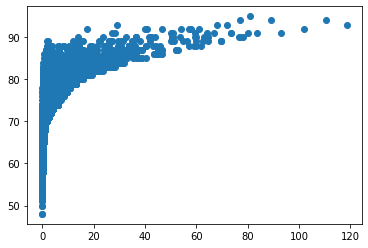

In [16]:
plt.scatter(fifa.ValueNumeric,fifa.Potential)

In [17]:
#Sí se observa una relación lineal entre las dos variables.